# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [2]:
import torch
from torchvision import datasets, transforms
import helper
from torch import nn
from torch import optim
import torch.nn.functional as F


SEED = 1234

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True, num_workers=8)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Here we can see one of the images.

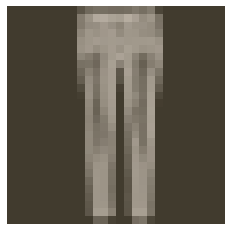

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
image.shape
device

device(type='cuda')

In [5]:
# TODO: Define your network architecture here
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)

    def forward(self, img):
        x = img.view(img.shape[0], -1)

        x = F.relu(self.input(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))

        # x = F.softmax(self.output(x), dim=1)
        x = F.log_softmax(self.output(x), dim=1)
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [6]:
# TODO: Create the network, define the criterion and optimizer
model = Network()
model = model.to(device)

# criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()
criterion = criterion.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.003)

In [7]:
next(model.parameters()).is_cuda

True

In [8]:
# TODO: Train the network here
epochs = 20
model.train()
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        images = images.to(device)
        labels = labels.to(device)

        # TODO: Training pass
        output = model(images)
        loss = criterion(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.6833662176031178
Training loss: 0.41339243569616546
Training loss: 0.3607360493328612
Training loss: 0.3387771291752993
Training loss: 0.3166616692886514
Training loss: 0.30274212612944135
Training loss: 0.29030127368741115
Training loss: 0.2760280080265918
Training loss: 0.2626144927689585
Training loss: 0.2564968889800169
Training loss: 0.24370995744810267
Training loss: 0.23725281617904115
Training loss: 0.23114161319651846
Training loss: 0.22661592078916096
Training loss: 0.2218434742446673
Training loss: 0.20513558918136662
Training loss: 0.2009545171917495
Training loss: 0.20129765936378705
Training loss: 0.19451268168829255
Training loss: 0.18618662289138568


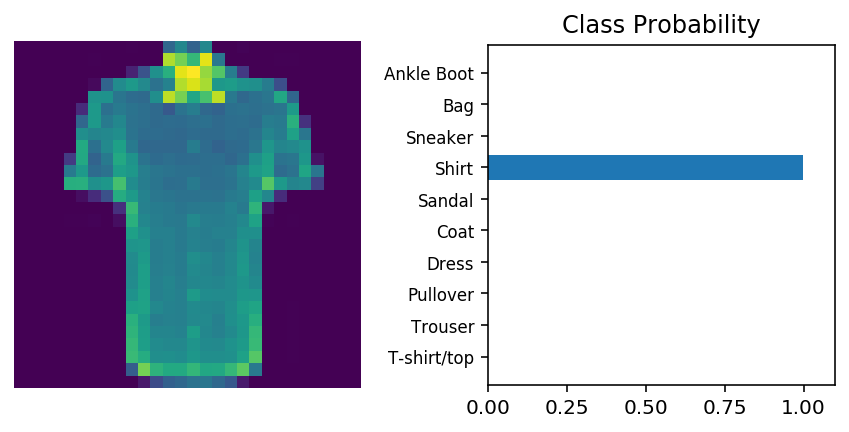

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
# images = images.to(device)
# labels = labels.to(device)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
model.cpu()
ps = model(img)
ps = torch.exp(ps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')
# ps